<a href="https://colab.research.google.com/github/aarsh121/Crude-Std-Death-Rate/blob/main/Financial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Analysis of Reliance Stocks by Aarsh


****Overview of the process-****

**SMA (Simple Moving Average)**

*   Gives equal weight to all data points
*  Reacts slowly to price changes

**EMA (Exponential Moving Average)**

*   Gives more weight to recent data points
*   Reacts faster to price changes

**Analysis Overview**

**Data Collection:** Gather historical stock price data.(Reliance Industry)

**SMA & EMA Calculation:** Calculate both over a specified period (e.g., 20 days and 50 days).

**Signal Generation:**
Buy signal: SMA_short crosses above SMA_long same for EMA
Sell signal: SMA_short crosses below SMA_long, same for EMA

**Backtesting:**
Evaluate strategy performance on historical data. Calculate metrics returns.

**Visualization:**


*   Stock price, SMA, and EMA on a chart
*   Highlight buy and sell signals


**1. Installing Yahoo Finance Library**

In [100]:
!pip install yfinance numpy pandas matplotlib
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

**2. Getting data of "Reliance" shares for the period of 2 years**

In [177]:
ticker = "RELIANCE.NS"  # Reliance Industries
period = "2y"  # Two years of data

df = yf.download(ticker, period=period, interval="1d")

print(df.head())


[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-08-10  2378.477783  2390.476807  2360.156250  2383.646729  2367.531494   
2022-08-11  2402.660400  2408.936768  2381.523682  2391.584473  2375.415527   
2022-08-12  2390.845947  2437.965088  2383.369873  2430.258057  2413.827881   
2022-08-16  2442.441650  2452.687012  2424.997070  2447.148926  2430.604492   
2022-08-17  2459.794189  2470.777832  2451.071777  2459.932617  2443.301758   

             Volume  
Date                 
2022-08-10  5362344  
2022-08-11  4099113  
2022-08-12  6325293  
2022-08-16  3303689  
2022-08-17  3297982  


**3. Performing some basic data preprocessing**

In [178]:
# Converting data to DataFrame
df=pd.DataFrame(data=df)

In [179]:
#print shape of the data
df.shape

(492, 6)

In [180]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [181]:
df.drop(columns=['High','Low','Volume'], inplace=True)

In [182]:
#statistics
df.describe()

,Open,Close,Adj Close
count,492.000000,492.000000,492.000000
mean,2513.400014,2512.554855,2508.266096
std,292.991300,294.264624,297.017136
min,2044.444336,2031.753052,2024.601196
25%,2301.470886,2298.081726,2294.904541
50%,2409.029053,2411.295166,2404.849121
75%,2833.237488,2836.612488,2836.612488
max,3208.899902,3201.800049,3201.800049


**4. Here we are calculating Simple moving average. As we know that SMA method lag the analysis- generally by N/2 days, where N is the number of day. It means that SMA graph reflect the change in the price after some delay when the actual change has happened much before.**

**So we are also calculating EMA(Exponential Moving Average), EMA shows less lag with respect to actual change in the stocks.**

In [183]:
# Calculating the short-term and long-term MAs
short_window = 20
long_window = 50

#Calculating SMA
df['SMA_20'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
df['SMA_50'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

#Calculating EMA
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

df[['Close', 'SMA_20', 'SMA_50', 'EMA_20','EMA_50']].head()


,Close,SMA_20,SMA_50,EMA_20,EMA_50
Date,,,,,
2022-08-10,2383.646729,2383.646729,2383.646729,2383.646729,2383.646729
2022-08-11,2391.584473,2387.615601,2387.615601,2384.402704,2383.958013
2022-08-12,2430.258057,2401.829753,2401.829753,2388.769881,2385.773701
2022-08-16,2447.148926,2413.159546,2413.159546,2394.329790,2388.180572
2022-08-17,2459.932617,2422.514160,2422.514160,2400.577678,2390.994378


In [184]:
#Adding a new column "Signal", if SMA_20>SMA_50, denote as 1 (Buy the stock), otherwise, denote as 0 (Sell the stock)
df['Signal_SMA']=np.where(df['SMA_20'] > df['SMA_50'], 1, 0)
df['Signal_SMA']=np.where(df['SMA_20'] < df['SMA_50'], -1, df['Signal_SMA'])

df['Signal_EMA']=np.where(df['EMA_20'] > df['EMA_50'], 1, 0)
df['Signal_EMA']=np.where(df['EMA_20'] < df['EMA_50'], -1, df['Signal_EMA'])

df.head()

,Open,Close,Adj Close,SMA_20,SMA_50,EMA_20,EMA_50,Signal_SMA,Signal_EMA
Date,,,,,,,,,
2022-08-10,2378.477783,2383.646729,2367.531494,2383.646729,2383.646729,2383.646729,2383.646729,0,0
2022-08-11,2402.660400,2391.584473,2375.415527,2387.615601,2387.615601,2384.402704,2383.958013,0,1
2022-08-12,2390.845947,2430.258057,2413.827881,2401.829753,2401.829753,2388.769881,2385.773701,0,1
2022-08-16,2442.441650,2447.148926,2430.604492,2413.159546,2413.159546,2394.329790,2388.180572,0,1
2022-08-17,2459.794189,2459.932617,2443.301758,2422.514160,2422.514160,2400.577678,2390.994378,0,1


**5. Ploting Normal Distribution**

In [185]:
df['LogReturn'] = np.log(df['Close']).shift(-1) - np.log(df['Close'])

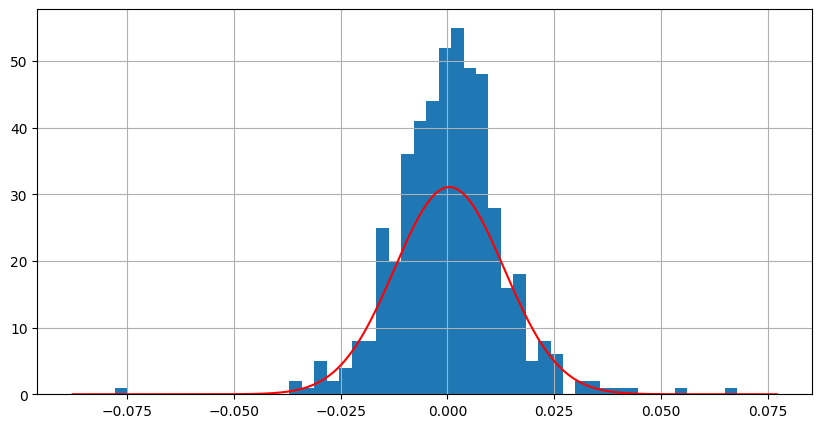

In [186]:
# Plot a histogram to show the distribution of log return of Reliance's stock.


from scipy.stats import norm
mu = df['LogReturn'].mean()
sigma = df['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(df['LogReturn'].min()-0.01, df['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

df['LogReturn'].hist(bins=50, figsize=(10, 5))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

We can see that distribution is close to Normal distbn. We can further use this log return to calculate the probability such as drop in the price of 5% over a day or a year. But we are not going to do that in this notebook.

**Moving on forward let's plot two graphs between SMA/EMA- 20 and SMA/EMA- 50**

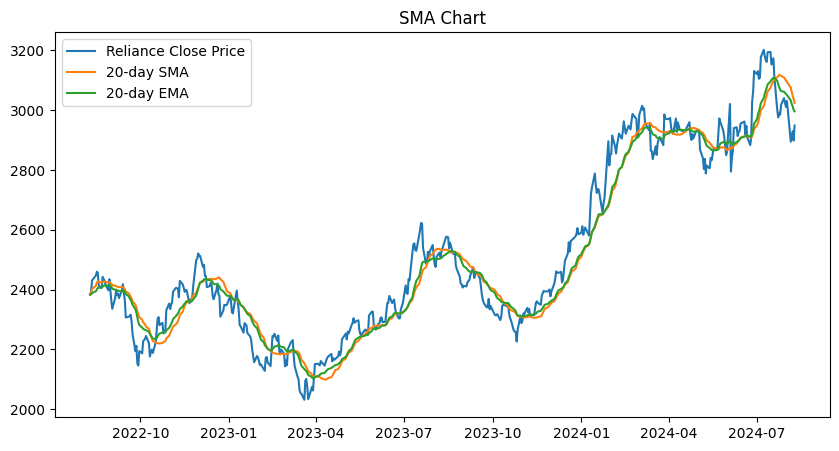

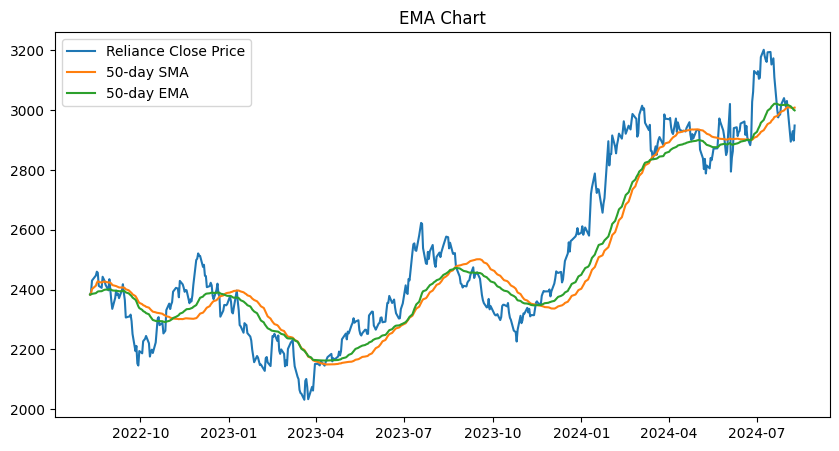

In [187]:
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Reliance Close Price')
plt.plot(df['SMA_20'], label='20-day SMA')
plt.plot(df['EMA_20'], label='20-day EMA')
plt.legend()
plt.title("SMA Chart")
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Reliance Close Price')
plt.plot(df['SMA_50'], label='50-day SMA')
plt.plot(df['EMA_50'], label='50-day EMA')
plt.title("EMA Chart")
plt.legend()
plt.show()

**Its clearly visible from the above two charts that EMA reflects change before the SMA method does.**

**Let's also visualize the Buy and Sell indicaters for both the Methods**

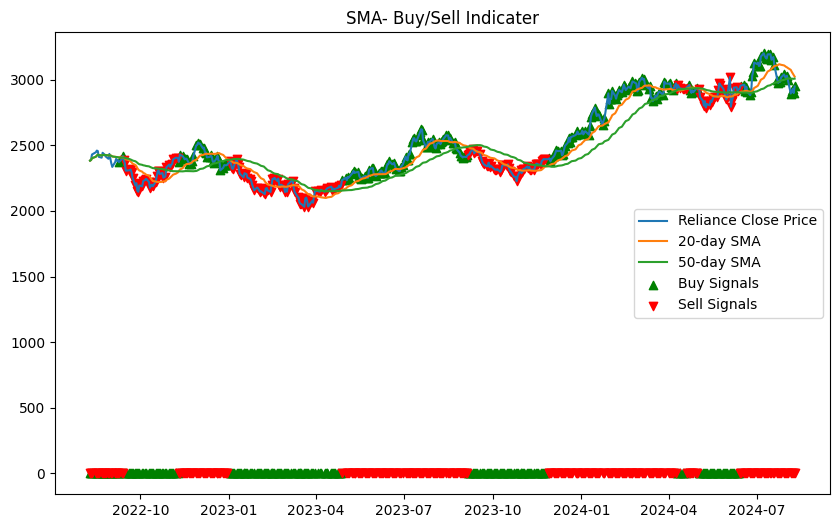

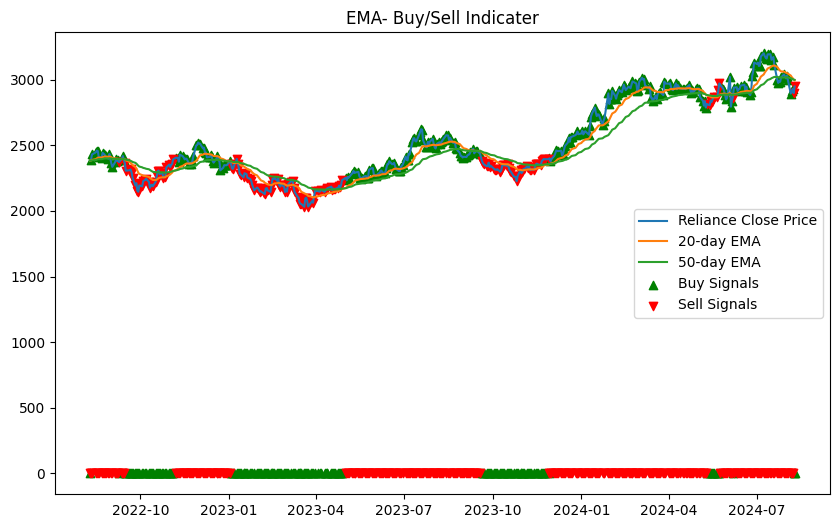

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Reliance Close Price')
plt.plot(df['SMA_20'], label='20-day SMA')
plt.plot(df['SMA_50'], label='50-day SMA')
plt.scatter(df.index, df['Close'] * (df['Signal_SMA'] == 1), label='Buy Signals', marker='^', color='g')
plt.scatter(df.index, df['Close'] * (df['Signal_SMA'] == -1), label='Sell Signals', marker='v', color='r')
plt.legend()
plt.title('SMA- Buy/Sell Indicater')
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Reliance Close Price')
plt.plot(df['EMA_20'], label='20-day EMA')
plt.plot(df['EMA_50'], label='50-day EMA')
plt.scatter(df.index, df['Close'] * (df['Signal_EMA'] == 1), label='Buy Signals', marker='^', color='g')
plt.scatter(df.index, df['Close'] * (df['Signal_EMA'] == -1), label='Sell Signals', marker='v', color='r')
plt.legend()
plt.title('EMA- Buy/Sell Indicater')
plt.show()

**6. Let's now Backtest the strategy on both methods- SMA and EMA. And see which method perform better**

**A) SMA Method**

In [189]:
# Initializing variables
initial_capital = 100000
position = 0
buy_price = 0
sell_price = 0
total_returns = 0
winning_trades = 0
losing_trades = 0
max_drawdown = 0
equity_curve = [initial_capital]

# Iterate through data
for i in range(len(df)):
    if df['Signal_SMA'][i] == 1 and position == 0:
        # Buy
        buy_price = df['Close'][i]
        shares_bought = initial_capital / buy_price
        position = 1
    elif df['Signal_SMA'][i] == -1 and position == 1:
        # Sell
        sell_price = df['Close'][i]
        profit_loss = shares_bought * (sell_price - buy_price)
        initial_capital += profit_loss
        position = 0
        equity_curve.append(initial_capital)
        total_returns += profit_loss / initial_capital
        if profit_loss > 0:
            winning_trades += 1
        else:
            losing_trades += 1
        max_drawdown = max(max_drawdown, abs(profit_loss / initial_capital))

# Calculate metrics
total_returns *= 100
winning_trade_percentage = (winning_trades / (winning_trades + losing_trades)) * 100
losing_trade_percentage = (losing_trades / (winning_trades + losing_trades)) * 100

<ipython-input-189-d74a960e6413>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Signal_SMA'][i] == 1 and position == 0:
<ipython-input-189-d74a960e6413>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Signal_SMA'][i] == -1 and position == 1:
<ipython-input-189-d74a960e6413>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_price = df['Close'][i]
<ipython-input-189-d74a960e6413>:21: FutureWarning: Series.__ge

**Metrics for SMA method**

In [190]:
print("Total Returns(SMA) %:", round(total_returns,2))
print("Number of Trades:", winning_trades + losing_trades)
print("Winning Trades (%):", winning_trade_percentage)
print("Losing Trades (%):", losing_trade_percentage)
print("Maximum Drawdown:", round(max_drawdown,2))

Total Returns(SMA) %: 26.84
Number of Trades: 5
Winning Trades (%): 80.0
Losing Trades (%): 20.0
Maximum Drawdown: 0.18


In [191]:
total_value=(total_returns*initial_capital)/100
total_value

35896.38472738872

**In the SMA strategy we can see that we are getting ~27% return rate. with 80% winning trades. and final profit we booked is- ~36000**

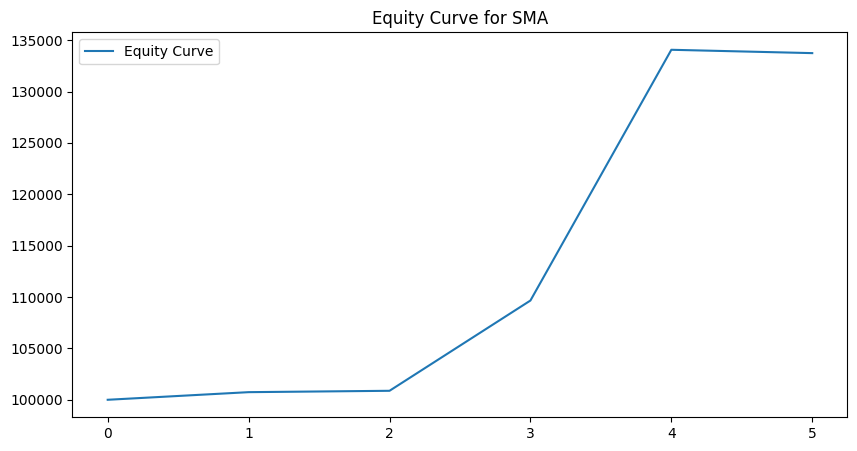

In [192]:
plt.figure(figsize=(10, 5))
plt.plot(equity_curve, label='Equity Curve')
plt.legend()
plt.title("Equity Curve for SMA")
plt.show()

**B) Now lets see performance of EMA strategy**

In [193]:
# Initializing variables
initial_capital = 100000
position = 0
buy_price = 0
sell_price = 0
total_returns = 0
winning_trades = 0
losing_trades = 0
max_drawdown = 0
equity_curve = [initial_capital]

# Iterate through data
for i in range(len(df)):
    if df['Signal_EMA'][i] == 1 and position == 0:
        # Buy
        buy_price = df['Close'][i]
        shares_bought = initial_capital / buy_price
        position = 1
    elif df['Signal_EMA'][i] == -1 and position == 1:
        # Sell
        sell_price = df['Close'][i]
        profit_loss = shares_bought * (sell_price - buy_price)
        initial_capital += profit_loss
        position = 0
        equity_curve.append(initial_capital)
        total_returns += profit_loss / initial_capital
        if profit_loss > 0:
            winning_trades += 1
        else:
            losing_trades += 1
        max_drawdown = max(max_drawdown, abs(profit_loss / initial_capital))

# Calculate metrics
total_returns *= 100
winning_trade_percentage = (winning_trades / (winning_trades + losing_trades)) * 100
losing_trade_percentage = (losing_trades / (winning_trades + losing_trades)) * 100

<ipython-input-193-d2d2f3b04a27>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Signal_EMA'][i] == 1 and position == 0:
<ipython-input-193-d2d2f3b04a27>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Signal_EMA'][i] == -1 and position == 1:
<ipython-input-193-d2d2f3b04a27>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  buy_price = df['Close'][i]
<ipython-input-193-d2d2f3b04a27>:21: FutureWarning: Series.__ge

In [194]:
print("Total Returns(EMA) %:", round(total_returns,2))
print("Number of Trades:", winning_trades + losing_trades)
print("Winning Trades (%):", winning_trade_percentage)
print("Losing Trades (%):", losing_trade_percentage)
print("Maximum Drawdown:", round(max_drawdown,2))

Total Returns(EMA) %: 11.13
Number of Trades: 7
Winning Trades (%): 28.57142857142857
Losing Trades (%): 71.42857142857143
Maximum Drawdown: 0.15


In [195]:
total_value=(total_returns*initial_capital)/100
total_value

12622.179416675892

**In the EMA strategy we can see that we are getting ~27% return rate. with 80% winning trades. and final profit we booked is- ~12600.**

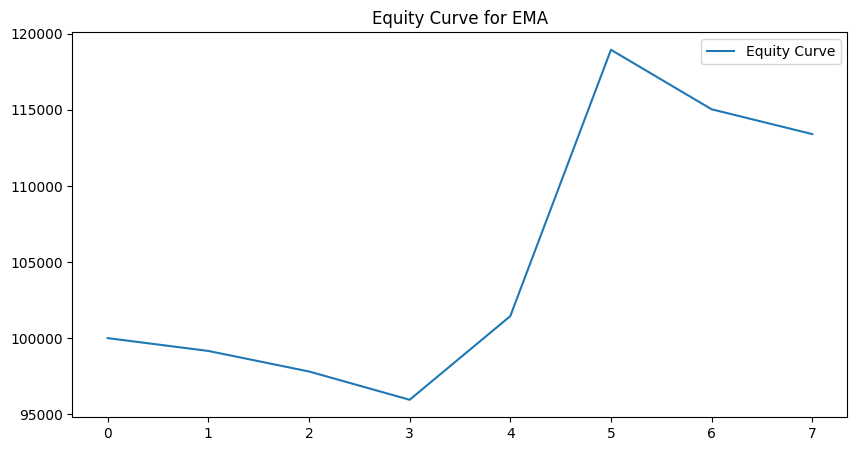

In [196]:
plt.figure(figsize=(10, 5))
plt.plot(equity_curve, label='Equity Curve')
plt.legend()
plt.title("Equity Curve for EMA")
plt.show()

# Conclusion
**So as though we have seen EMA perform better in the comparison chart, but in the simulation it under perfoms. SMA gives more high return and profit. This can depend on various factors.  But We can observe that Maximum Drawdown is 0.15 in EMA and 0.18 in SMA method. so as per risk mitigation part EMA is better than SMA.**